In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# EPFL Machine Learning Higgs

This notebook presents our results for the EPFL Machine Learning Higgs Boson Challenge.
We first apply all mandatory implementations from the project to the challenge, on raw unaltered data.

In a second step, we use different techniques to better our prediction performance, namely on the Ridge Regression model that we choose as our baseline.

Finaly, the last section of the notebook allows us to compute our prediction on the test set.

## 1. Load the training data into feature matrix, class labels, and event ids:

In [3]:
from proj1_helpers import *
from implementations import least_squares, least_squares_GD, least_squares_SGD, ridge_regression, logistic_regression, reg_logistic_regression
from cross_validation import *
from plots import *

In [4]:
DATA_TRAIN_PATH = 'data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## 2. Classic ML methods without any data pre-processing

The following predictions are made using the functions implemented during the course labs. The results serve as a baseline to compare with our future results and see weather there is improvement. The selected parameter where also randomly chosen.
### 2.1 Least Squares GD

In [6]:
kwargs = {}
kwargs['max_iters'] = 10
kwargs['gamma'] = 0.1

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, tX, compute_accuracy, 'least_squares_GD', k_fold=4, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.4182063027028858
Mean testing loss: 0.4169221489890197
Mean training accuracy: 0.6923906666666668
Mean testing accuracy: 0.692396


### 2.2 Least Squares SGD

In [7]:
kwargs = {}
kwargs['max_iters'] = 50
kwargs['gamma'] = 0.001

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, tX, compute_accuracy, 'least_squares_SGD', k_fold=4, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.4773664334545206
Mean testing loss: 0.47676613351706765
Mean training accuracy: 0.6456706666666666
Mean testing accuracy: 0.645228


### 2.3 Least Squares, normal equations

In [23]:
loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, tX, compute_accuracy, 'least_squares', k_fold=4)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.3889363604714363
Mean testing loss: 0.3890671452268004
Mean training accuracy: 0.718468
Mean testing accuracy: 0.7184320000000001


### 2.4 Ridge Regression

In [18]:
kwargs = {}
kwargs['lambda_'] = 0.001

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, tX, compute_accuracy, 'ridge_regression', k_fold=4, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.38952529781317496
Mean testing loss: 0.38960983656413656
Mean training accuracy: 0.7175986666666666
Mean testing accuracy: 0.71742


### 2.5 Logistic Regression

In [25]:
kwargs = {}
kwargs['max_iters'] = 100
kwargs['gamma'] = 0.00001

# We modify the labels taking into account the fact that logistic regression returns 0 instead of -1
y_log_reg = (y+1)/2

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y_log_reg, tX, compute_accuracy_log_reg, 'logistic_regression', k_fold=4, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 234959.56653122348
Mean testing loss: 0.9902666664419358
Mean training accuracy: 0.5839799999999999
Mean testing accuracy: 0.584004


### 2.6 Penalized Logistic Regression

In [26]:
kwargs = {}
kwargs['max_iters'] = 1000
kwargs['gamma'] = 0.00001
kwargs['lambda_'] = 0.0001

# We modify the labels taking into account the fact that logistic regression returns 0 instead of -1
y_log_reg = (y+1)/2

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y_log_reg, tX, compute_accuracy_log_reg, 'reg_logistic_regression', k_fold=4, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 206552.33215697762
Mean testing loss: 0.9631777532401782
Mean training accuracy: 0.5972013333333334
Mean testing accuracy: 0.5970960000000001


## 3. Improving the baseline model

We now try to perform different techniques to improve our prediction using ridge regression, and stack them along this notebook.

We recall that the raw model performance was 71.74% in terms of mean test accuracy.

#### 3.1 Data preprocessing

We can see in the graphs below that the distribution of predictions based on DER_mass_MMC being -999 is basically the same as the one for values of DER_mass_MMC ranging from 60 to 80. We thus decide to replace those -999 values with uniformly distributed values in the range (60,80).

Text(0.5, 1.0, 'Distribution of predictions when DER_mass_MMC is between 60 and 80')

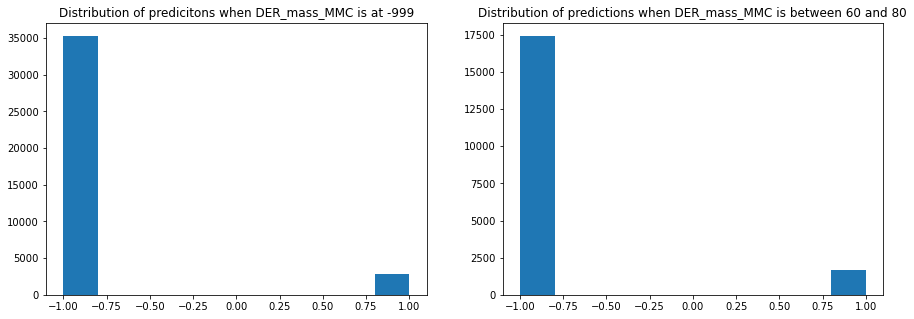

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.hist(y[tX[:,0] == -999])
ax1.set_title("Distribution of predicitons when DER_mass_MMC is at -999")
ax2.hist(y[(tX[:,0] < 80) & (tX[:,0] > 60)])
ax2.set_title("Distribution of predictions when DER_mass_MMC is between 60 and 80")

In [64]:
# mass_abs changes every value of DER_mass_MMC being -999 to a value between 60 and 80 (uniformly).
tx = mass_abs(tX)

In [65]:
kwargs = {}
kwargs['lambda_'] = 0.001

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, tx, compute_accuracy, 'ridge_regression', k_fold=4, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.38874759658721747
Mean testing loss: 0.3888369260167947
Mean training accuracy: 0.7175546666666667
Mean testing accuracy: 0.71766


Our testing accuracy increases by 0.02 percentage point.

We also take a look at some distributions of our features. We can see below that for the columns PRI_tau_phi, PRI_lep_phi, and PRI_met_phi the distribution is uniform wether it is a signal or a background noise. Thus those columns are not giving us any information on the prediction, we can therefore delete them from our training data.

(array([4278., 4283., 4247., 4250., 4131., 4195., 4211., 4484., 4226.,
        4289., 4322., 4240., 4407., 4341., 4240., 4321., 4334., 4370.,
        4306., 4192.]),
 array([-3.142 , -2.8278, -2.5136, -2.1994, -1.8852, -1.571 , -1.2568,
        -0.9426, -0.6284, -0.3142,  0.    ,  0.3142,  0.6284,  0.9426,
         1.2568,  1.571 ,  1.8852,  2.1994,  2.5136,  2.8278,  3.142 ]),
 <BarContainer object of 20 artists>)

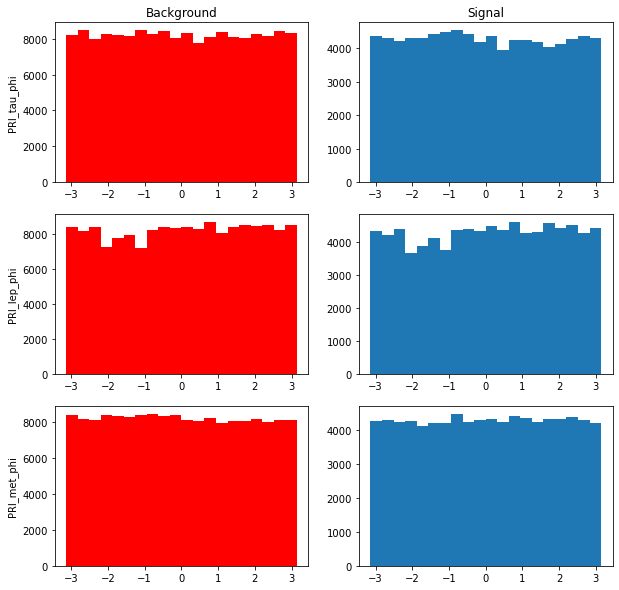

In [66]:
fig, axes = plt.subplots(3, 2, figsize = (10, 10))
axes[0, 0].hist(tx[y == -1, 15], bins = 20, color = 'red')
axes[0, 0].set_title("Background")
axes[0, 0].set_ylabel("PRI_tau_phi")
axes[0, 1].hist(tx[y == 1, 15], bins = 20)
axes[0, 1].set_title("Signal")
axes[1, 0].hist(tx[y == -1, 18], bins = 20, color = 'red')
axes[1, 0].set_ylabel("PRI_lep_phi")
axes[1, 1].hist(tx[y == 1, 18], bins = 20)
axes[2, 0].hist(tx[y == -1, 20], bins = 20, color = 'red')
axes[2, 0].set_ylabel("PRI_met_phi")
axes[2, 1].hist(tx[y == 1, 20], bins = 20)

In [67]:
# Removing the columns
tx = np.delete(tx, [15, 18, 20], axis = 1)

In [68]:
kwargs = {}
kwargs['lambda_'] = 0.001

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, tx, compute_accuracy, 'ridge_regression', k_fold=4, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.38875341931828106
Mean testing loss: 0.38883637617685646
Mean training accuracy: 0.7175239999999999
Mean testing accuracy: 0.717576


Our accuracy very slightly decreases but we believe it to be an acceptable loss for some feature space reduction.

#### 3.2 Adding an offset term

We start off by adding an offset term to our regression, thus giving our problem one extra dimension and reaching D = 28.

In [69]:
kwargs = {}
kwargs['lambda_'] = 0.001

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, tx, compute_accuracy, 'ridge_regression', k_fold=4, add_offset=True, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.3392455361057327
Mean testing loss: 0.33933707908224686
Mean training accuracy: 0.745392
Mean testing accuracy: 0.745404


 Adding an offset term proves to be succesful operation, improving our performance by roughly 2.79 percentage points.

#### 3.3 Polynomial extension

As a second technique, we decide to conduct a polynomial extension of our features. We take the square of each of our selected features, thus leading to D = 55 dimension space (27 * 2 + 1).

In [70]:
kwargs = {}
kwargs['lambda_'] = 0.001

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, tx, compute_accuracy, 'ridge_regression', k_fold=4, degree=2, add_offset=True, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.3017414859312622
Mean testing loss: 0.33592664456089477
Mean training accuracy: 0.7912786666666667
Mean testing accuracy: 0.7912359999999999


Once again, the performance increases, by roughly 4.58 percentage points.

#### 3.4 Hyper-parameter search

Our model now has two different hyper-parameter: the degree of the polynomial extension, and the regularisation parameter lambda. We conduct a double hyper-parameter grid search, and select the best performing pair in terms of mean testing accuracy over all testing folds.

Best degree: 9
Best lambda: 1.389495494373136e-10


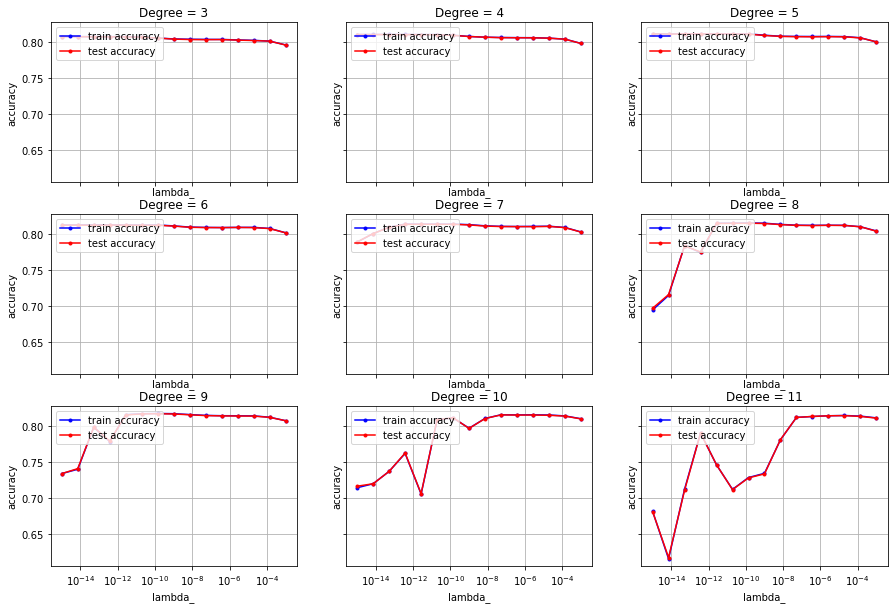

In [28]:
max_degree = 11
degree_space = range(3, max_degree + 1)
lambda_space = np.logspace(-15, -3, 15)
best_degree, best_lambda = cross_validation_degree_and_param_search(y, tx, param_name='lambda_',
                                                                    degree_space=degree_space,
                                                                    param_space=lambda_space,
                                                                    metric=compute_accuracy,
                                                                    learning_model='ridge_regression',
                                                                    add_offset=True,
                                                                    k_fold=4)
print('Best degree: {}'.format(best_degree))
print('Best lambda: {}'.format(best_lambda))

In [72]:
kwargs = {}
kwargs['lambda_'] = best_lambda

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, tx, compute_accuracy, 'ridge_regression', k_fold=4, degree=best_degree, add_offset=True, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.2714370317905046
Mean testing loss: 6.9911816972656296e+16
Mean training accuracy: 0.81646
Mean testing accuracy: 0.815952


The returned pair is degree = 9 and lambda roughly equal to 1.38e-10. Using these values we indeed obtain a better performance, now reaching 81.59% accuracy, which is roughly a 2.47 percentage point increase.
We also notice that paradoxaly, the testing loss has exploded. Nonetheless, this kind of behavior can happen when using MSE which is the case here in the ridge regression.

## Generate predictions and save ouput in csv format for submission:

In [119]:
DATA_TEST_PATH = 'data/test.csv'

_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [224]:
OUTPUT_PATH = 'data/output.csv'
y_pred = predict_labels(w, tx_test_poly)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)